In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Linear regression

In [4]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [3]:
x_mean = 70
x_sd = 10
y_mean = 50
y_sd = 12
r = 0.75

In [4]:
((90-x_mean)/x_sd) * r * y_sd + y_mean

68.0

In [5]:
((60-x_mean)/x_sd) * r * y_sd + y_mean

41.0

In [6]:
# y = a * x + b
a = r * y_sd / x_sd
b = y_mean - a * x_mean

In [7]:
a * 90 + b

68.0

In [8]:
a * 60 + b

41.0

In [5]:
def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

## Least squares

In [7]:
little_women = Table.read_table('http://inferentialthinking.com/notebooks/little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


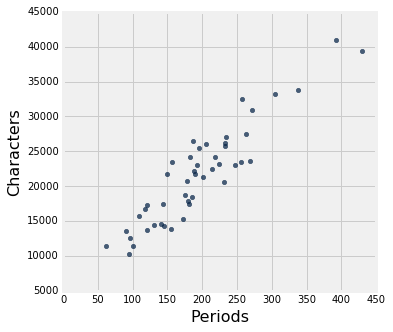

In [8]:
little_women.scatter('Periods', 'Characters')

In [9]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

In [68]:
slope(little_women, 0, 1)

86.977841258298213

In [66]:
slope(little_women, 1, 0)

0.0097938841024488923

In [10]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

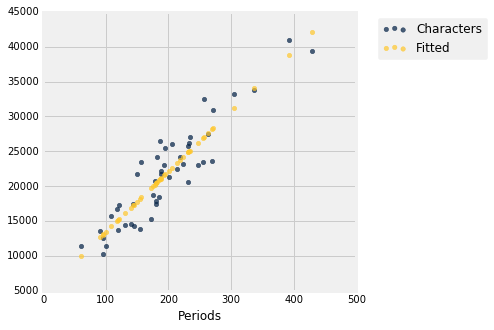

In [11]:
lw_fitted = little_women.with_column('Fitted', fit(little_women, 0, 1))
lw_fitted.scatter(0)

In [12]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plt.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     87.0 characters per period
Intercept: 4745.0 characters


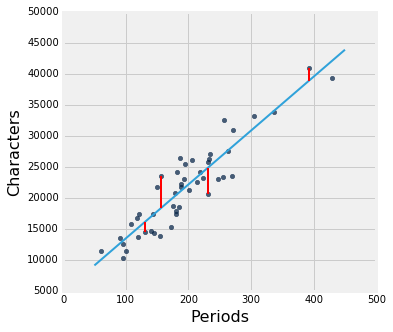

In [13]:
lw_reg_slope = slope(little_women, 'Periods', 'Characters')
lw_reg_intercept = intercept(little_women, 'Periods', 'Characters')
lw_errors(lw_reg_slope, lw_reg_intercept)

In [ ]:
lw_errors(50, 10000)

In [ ]:
lw_errors(-100, 50000)

In [16]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [ ]:
lw_rmse(50, 10000)

In [ ]:
lw_rmse(-100, 50000)

In [ ]:
lw_rmse(90, 4000)

In [ ]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

## Numerical Optimization

In [25]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [27]:
lw_mse(90, 4000)

7374152.6382978726

In [28]:
lw_mse(90, 4000) ** 0.5

2715.5391063834586

In [21]:
def f(x):
    return (x - 3) ** 2 + 1

In [22]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [23]:
minimize(f)

2.999999999968361

In [24]:
f(minimize(f))

1.0

In [ ]:
lw_rmse(90, 4000)

In [29]:
best = minimize(lw_mse)
best

array([   86.97784117,  4744.78484535])

In [30]:
make_array(lw_reg_slope, lw_reg_intercept)

array([   86.97784126,  4744.78479657])

## Non-linear regression

In [71]:
shotput = Table.read_table('http://inferentialthinking.com/notebooks/shotput.csv')
shotput.show(3)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4


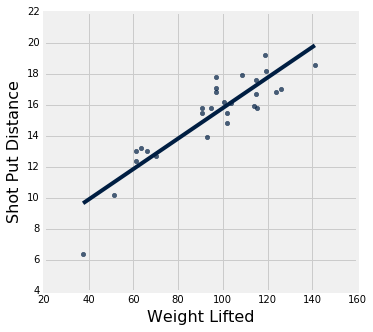

In [70]:
shotput.scatter(0, 1, fit_line=True)

What about fitting:

$$a x^2 + bx + c $$

In [40]:
def shotput_quadratic_mse(a, b, c):
    x = shotput.column(0)
    y = shotput.column(1)
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

In [41]:
best = minimize(shotput_quadratic_mse)
best

array([ -1.04004838e-03,   2.82708045e-01,  -1.53182115e+00])

In [42]:
x = shotput.column(0)
quadratic_fitted = best.item(0)*(x**2) + best.item(1)*x + best.item(2)

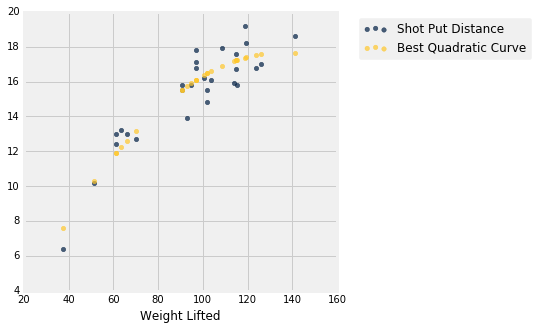

In [43]:
shotput.with_column('Best Quadratic Curve', quadratic_fitted).scatter(0)

What about fitting:

$$
ae^{bx} + c
$$

In [58]:
def shotput_exp_mse(a, b, c):
    x = shotput.column(0)
    y = shotput.column(1)
    fitted = a*(np.exp(b * x)) + c
    return np.mean((y - fitted) ** 2)

In [59]:
best = minimize(shotput_exp_mse)
best

array([  1.44905764e+01,   4.39232671e-03,  -6.81415611e+00])

In [63]:
x = shotput.column(0)
exp_fitted = best.item(0)*np.exp(best.item(1) * x) + best.item(2)

Discussion question: Why do these two look so similar?

In [ ]:
shotput.with_column('Best Exponential Curve', exp_fitted).scatter(0)

In [ ]:
shotput.with_column('Best Straight Line', fit(shotput, 0, 1)).scatter(0)